<a href="https://www.kaggle.com/code/mugwewaithaka/rop-screening-binary-deeplearning-model?scriptVersionId=263870332" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retinal-image-dataset-of-infants-and-rop/infant_retinal_database_info.csv
/kaggle/input/retinal-image-dataset-of-infants-and-rop/infant_retinal_database_info.xlsx
/kaggle/input/retinal-image-dataset-of-infants-and-rop/images_stack_without_captions/images_stack_without_captions/019_M_GA35_BW3050_PA46_DG11_PF0_D1_S03_3.jpg
/kaggle/input/retinal-image-dataset-of-infants-and-rop/images_stack_without_captions/images_stack_without_captions/164_F_GA30_BW1490_PA32_DG0_PF0_D3_S01_2.jpg
/kaggle/input/retinal-image-dataset-of-infants-and-rop/images_stack_without_captions/images_stack_without_captions/120_M_GA31_BW1670_PA39_DG0_PF0_D2_S03_15.jpg
/kaggle/input/retinal-image-dataset-of-infants-and-rop/images_stack_without_captions/images_stack_without_captions/138_F_GA26_BW680_PA35_DG3_PF2_D2_S03_5.jpg
/kaggle/input/retinal-image-dataset-of-infants-and-rop/images_stack_without_captions/images_stack_without_captions/093_M_GA31_BW1590_PA34_DG0_PF0_D2_S01_1.jpg
/kaggle/input/retinal-image

In [7]:
import os
import pandas as pd
from glob import glob

# Paths
DATA_DIR = '/kaggle/input/retinal-image-dataset-of-infants-and-rop'
IMAGES_DIR = os.path.join(DATA_DIR, 'images_stack_without_captions')
METADATA_PATH = os.path.join(DATA_DIR, 'infant_retinal_database_info.csv')

# --- Metadata ---
try:
    metadata_df = pd.read_csv(METADATA_PATH, sep=";")
    print(" Metadata loaded successfully")
    print(f"Metadata shape: {metadata_df.shape}")
    print("Metadata columns:", list(metadata_df.columns))
except Exception as e:
    print(" Metadata not found or could not be parsed:", e)
    metadata_df = None

# --- Images ---
# Search recursively for jpg/jpeg files (works for nested folders too)
image_files = glob(os.path.join(IMAGES_DIR, "**", "*.jpg"), recursive=True)

if len(image_files) == 0:
    print(f" No images found in {IMAGES_DIR}")
    print("Checking available subdirectories in dataset root:")
    print(os.listdir(DATA_DIR))
else:
    print(f"\n Total images found: {len(image_files)}")
    print("Sample filenames:")
    for i, filename in enumerate(image_files[:5]):
        print(f"  {i+1}. {os.path.basename(filename)}")

 Metadata loaded successfully
Metadata shape: (484, 9)
Metadata columns: ['ID', 'SEX', 'GESTATIONAL AGE (GA)', 'BIRTH WEIGHT (BW)', 'POSTCONCEPTUAL AGE (PA)', 'DIAGNOSIS CODE (DG)', 'PLUS FORM (PF)', 'DEVICE (D)', 'SERIE NUMBER (S)']

 Total images found: 6004
Sample filenames:
  1. 019_M_GA35_BW3050_PA46_DG11_PF0_D1_S03_3.jpg
  2. 164_F_GA30_BW1490_PA32_DG0_PF0_D3_S01_2.jpg
  3. 120_M_GA31_BW1670_PA39_DG0_PF0_D2_S03_15.jpg
  4. 138_F_GA26_BW680_PA35_DG3_PF2_D2_S03_5.jpg
  5. 093_M_GA31_BW1590_PA34_DG0_PF0_D2_S01_1.jpg


In [8]:
import os
import pandas as pd

def parse_diagnosis_from_filename(filename: str):
    """
    Extract diagnosis code (DG) from filename.
    Format:
    PatientID_Sex_GA##_BW####_PA##_DG#_PF#_Device_Series_ImageNum.jpg
    """
    try:
        parts = os.path.basename(filename).split('_')
        for part in parts:
            if part.startswith('DG'):
                return int(part[2:])  # number after 'DG'
        return None
    except Exception as e:
        print(f"Could not parse diagnosis from {filename}: {e}")
        return None

def convert_to_binary_label(diagnosis_code: int):
    """
    Convert multi-class diagnosis to binary:
    - DG0 → 0 (No ROP)
    - DG1, DG2, ... → 1 (ROP present)
    """
    if diagnosis_code is None:
        return None
    return 0 if diagnosis_code == 0 else 1


# --- Process all files ---
diagnoses, binary_labels, valid_files = [], [], []

for filepath in image_files:
    diagnosis = parse_diagnosis_from_filename(filepath)
    if diagnosis is not None:
        binary_label = convert_to_binary_label(diagnosis)
        diagnoses.append(diagnosis)
        binary_labels.append(binary_label)
        valid_files.append(filepath)

print(f" Successfully parsed {len(valid_files)} images with labels")

# --- Build dataframe ---
df = pd.DataFrame({
    'filepath': valid_files,
    'original_diagnosis': diagnoses,
    'binary_label': binary_labels
})

print(df.head())
print("\nClass distribution:")
print(df['binary_label'].value_counts())


 Successfully parsed 6004 images with labels
                                            filepath  original_diagnosis  \
0  /kaggle/input/retinal-image-dataset-of-infants...                  11   
1  /kaggle/input/retinal-image-dataset-of-infants...                   0   
2  /kaggle/input/retinal-image-dataset-of-infants...                   0   
3  /kaggle/input/retinal-image-dataset-of-infants...                   3   
4  /kaggle/input/retinal-image-dataset-of-infants...                   0   

   binary_label  
0             1  
1             0  
2             0  
3             1  
4             0  

Class distribution:
binary_label
1    3024
0    2980
Name: count, dtype: int64


 CLASS DISTRIBUTION ANALYSIS
Original Diagnosis Codes:
Diagnosis  0:  2980 images ( 49.6%) ████████████████████████
Diagnosis  1:    45 images (  0.7%) 
Diagnosis  2:   252 images (  4.2%) ██
Diagnosis  3:   458 images (  7.6%) ███
Diagnosis  4:   125 images (  2.1%) █
Diagnosis  8:   470 images (  7.8%) ███
Diagnosis  9:   379 images (  6.3%) ███
Diagnosis 10:    72 images (  1.2%) 
Diagnosis 11:  1061 images ( 17.7%) ████████
Diagnosis 12:    48 images (  0.8%) 
Diagnosis 13:   114 images (  1.9%) 

Total labeled images: 6004

BINARY CLASSIFICATION DISTRIBUTION:
No ROP (0)   :  2980 images ( 49.6%)
ROP Present (1):  3024 images ( 50.4%)

Imbalance ratio: 0.99:1 (Normal : ROP)
🟢 Class imbalance severity: MILD


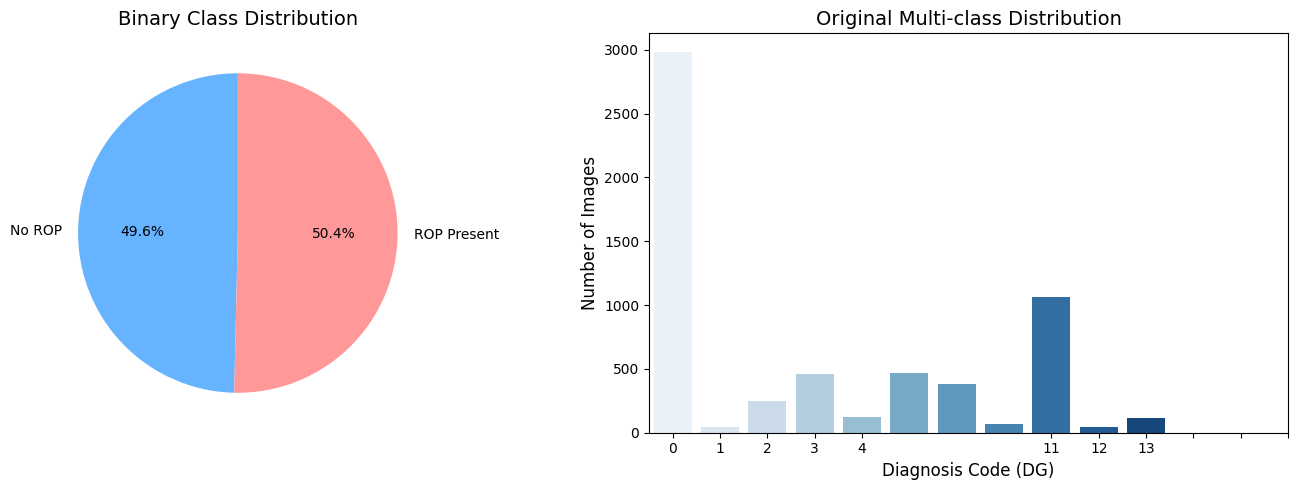

In [9]:
# Cell 4: Analyze Class Distribution
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print(" CLASS DISTRIBUTION ANALYSIS")
print("="*50)

# --- Original multi-class distribution ---
print("Original Diagnosis Codes:")
original_dist = pd.Series(diagnoses).value_counts().sort_index()

for code, count in original_dist.items():
    percentage = (count / len(diagnoses)) * 100
    bar = "█" * int(percentage // 2)  # proportional text bar
    print(f"Diagnosis {code:2d}: {count:5d} images ({percentage:5.1f}%) {bar}")

print(f"\nTotal labeled images: {len(diagnoses)}")

# --- Binary distribution ---
binary_dist = pd.Series(binary_labels).value_counts().sort_index()
print("\nBINARY CLASSIFICATION DISTRIBUTION:")

for label, count in binary_dist.items():
    percentage = (count / len(binary_labels)) * 100
    label_name = "No ROP (0)" if label == 0 else "ROP Present (1)"
    print(f"{label_name:13}: {count:5d} images ({percentage:5.1f}%)")

# --- Imbalance ratio ---
imbalance_ratio = (binary_dist[0] / binary_dist[1]) if 1 in binary_dist else float('inf')
print(f"\nImbalance ratio: {imbalance_ratio:.2f}:1 (Normal : ROP)")

# --- Severity assessment ---
if imbalance_ratio > 10:
    severity, color = "SEVERE", "🔴"
elif imbalance_ratio > 3:
    severity, color = "MODERATE", "🟡"
else:
    severity, color = "MILD", "🟢"

print(f"{color} Class imbalance severity: {severity}")

# --- Visualization ---
plt.figure(figsize=(14, 5))

# Binary distribution pie chart
plt.subplot(1, 2, 1)
labels = ['No ROP', 'ROP Present']
colors = ['#66b3ff', '#ff9999']
plt.pie(binary_dist.values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Binary Class Distribution', fontsize=14)

# Original multi-class bar plot
plt.subplot(1, 2, 2)
sns.barplot(x=original_dist.index, y=original_dist.values, palette="Blues")
plt.xlabel('Diagnosis Code (DG)', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Original Multi-class Distribution', fontsize=14)
plt.xticks(original_dist.index)

plt.tight_layout()
plt.show()


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [14]:
pip install opencv-python-headless


Note: you may need to restart the kernel to use updated packages.


 Displaying Sample Images


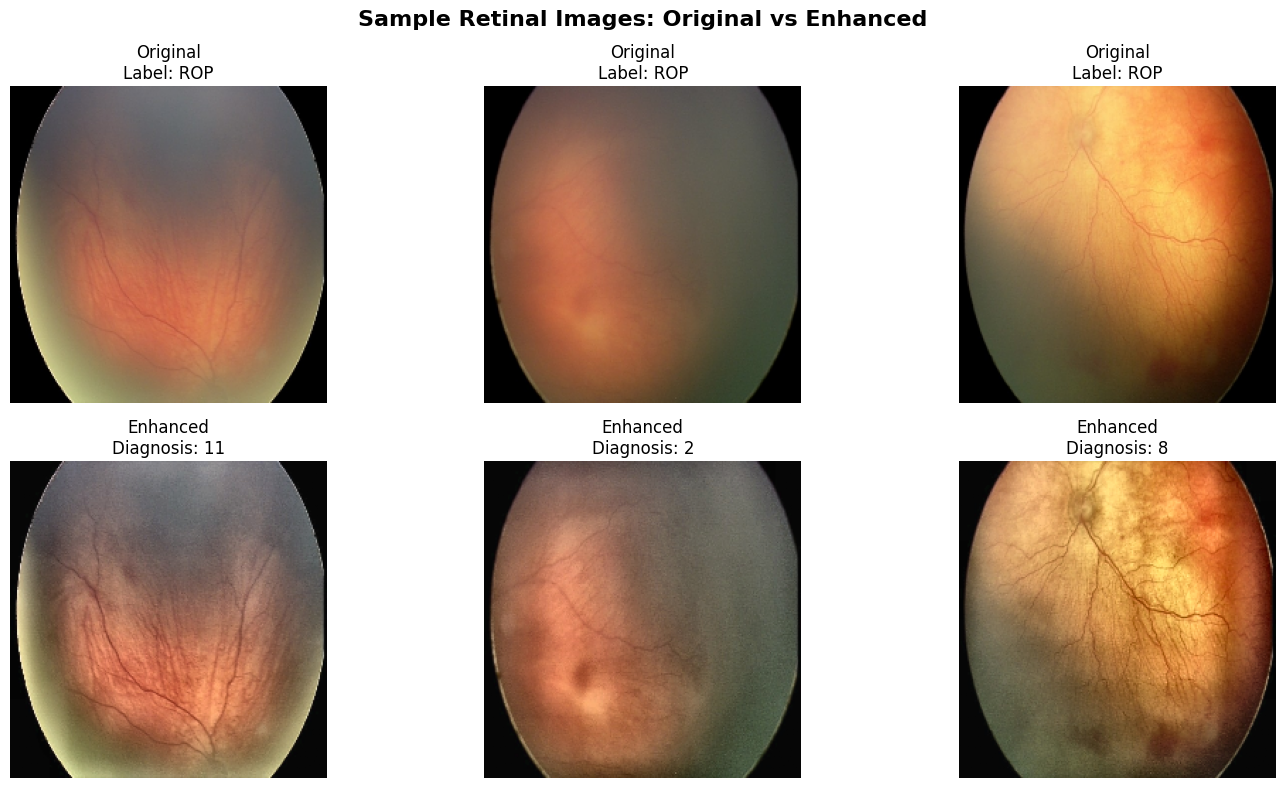

In [15]:
# Cell 5: Image Loading and Preprocessing
def load_and_preprocess_image(image_path, target_size=(224, 224), enhance=True):
    """
    Load and preprocess a retinal image with optional medical-specific enhancements.
    
    Args:
        image_path (str): Path to the input image.
        target_size (tuple): Desired image size (width, height).
        enhance (bool): Whether to apply medical-specific enhancements.
    
    Returns:
        np.ndarray or None: Preprocessed image as float32 in [0, 1], or None if loading fails.
    """
    try:
        # Load image
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if img is None:
            return None

        # Convert BGR → RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Medical enhancement (Contrast Limited Adaptive Histogram Equalization - CLAHE)
        if enhance:
            lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
            l, a, b = cv2.split(lab)
            clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
            l = clahe.apply(l)
            lab = cv2.merge((l, a, b))
            img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

        # Resize and normalize
        img = cv2.resize(img, target_size)
        img = img.astype(np.float32) / 255.0

        return img

    except Exception as e:
        print(f" Error processing {image_path}: {e}")
        return None


def show_sample_images(df, n_samples=3):
    """
    Display sample images (original vs enhanced) for quick quality check.
    
    Args:
        df (pd.DataFrame): DataFrame containing 'filepath', 'binary_label', 'original_diagnosis'.
        n_samples (int): Number of sample images to display (default=3).
    """
    print(" Displaying Sample Images")
    print("=" * 50)

    # Select first, middle, and last indices
    sample_indices = [0, len(df) // 2, -1] if n_samples == 3 else np.linspace(0, len(df)-1, n_samples, dtype=int)

    fig, axes = plt.subplots(2, len(sample_indices), figsize=(5 * len(sample_indices), 8))

    for i, idx in enumerate(sample_indices):
        row = df.iloc[idx]
        img = load_and_preprocess_image(row['filepath'], enhance=False)
        img_enhanced = load_and_preprocess_image(row['filepath'], enhance=True)

        if img is not None and img_enhanced is not None:
            # Original
            axes[0, i].imshow(img)
            axes[0, i].set_title(f"Original\nLabel: {['No ROP','ROP'][row['binary_label']]}")
            axes[0, i].axis("off")

            # Enhanced
            axes[1, i].imshow(img_enhanced)
            axes[1, i].set_title(f"Enhanced\nDiagnosis: {row['original_diagnosis']}")
            axes[1, i].axis("off")
        else:
            axes[0, i].text(0.5, 0.5, "Load Failed", ha="center", va="center")
            axes[1, i].text(0.5, 0.5, "Load Failed", ha="center", va="center")

    plt.suptitle("Sample Retinal Images: Original vs Enhanced", fontsize=16, weight="bold")
    plt.tight_layout()
    plt.show()


# Run test visualization
show_sample_images(df, n_samples=3)


Step 5: Advanced Data Augmentation for Medical Images.
Medical images require domain-specific augmentation that preserves clinical features while increasing dataset diversity.

In [16]:
def create_medical_augmentation():
    """
    Augmentation pipeline for retinal images
    """
    augmentation = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.05,
        height_shift_range=0.05,
        zoom_range=0.1,
        horizontal_flip=True,
        brightness_range=[0.8, 1.2],
        channel_shift_range=0.1,
        fill_mode='reflect',
        rescale=1./255  # handle normalization here instead of in preprocessing
    )
    return augmentation

train_augmentation = create_medical_augmentation()

# Optional: small Gaussian noise for robustness
def add_gaussian_noise(img, mean=0.0, std=0.01):
    noise = np.random.normal(mean, std, img.shape)
    noisy_img = np.clip(img + noise, 0., 1.)
    return noisy_img

In [19]:
# Cell 6: Class Imbalance Solutions
print(" IMPLEMENTING CLASS IMBALANCE SOLUTIONS")
print("="*50)

#  Required imports
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split

# Solution 1: Calculate class weights
def calculate_class_weights(y_binary, strategy='medical'):
    """
    Calculate class weights for imbalanced medical data
    """
    class_counts = np.bincount(y_binary)
    total_samples = len(y_binary)
    
    if strategy == 'balanced':
        # Standard balanced weighting
        weights = compute_class_weight('balanced', classes=np.unique(y_binary), y=y_binary)
    elif strategy == 'medical':
        # Medical-focused: higher penalty for missing disease cases
        majority_class_size = max(class_counts)
        weights = []
        for count in class_counts:
            if count == max(class_counts):  # Majority class
                weights.append(1.0)
            else:  # Minority class - give higher weight
                weights.append((majority_class_size / count) * 2.0)
        weights = np.array(weights)
    
    weight_dict = {i: weight for i, weight in enumerate(weights)}
    
    print(f"Class weights ({strategy} strategy):")
    print(f"  No ROP (0):      {weight_dict[0]:.3f}")
    print(f"  ROP Present (1): {weight_dict[1]:.3f}")
    print(f"  → ROP cases weighted {weight_dict[1]/weight_dict[0]:.1f}x higher")
    
    return weight_dict

# Calculate medical-focused class weights
class_weights = calculate_class_weights(binary_labels, strategy='medical')

# Solution 2: Stratified train-test split
print(f"\n STRATIFIED DATA SPLITTING")
print("-"*30)

X_indices = np.arange(len(df))
y_binary = np.array(binary_labels)

# First split: Train vs Test (80/20)
train_idx, test_idx, y_train, y_test = train_test_split(
    X_indices, y_binary,
    test_size=0.2,
    stratify=y_binary,
    random_state=42
)

# Second split: Train vs Validation (64/16/20 total)
train_idx, val_idx, y_train_split, y_val = train_test_split(
    train_idx, y_train,
    test_size=0.2,  # 20% of remaining 80% = 16% of total
    stratify=y_train,
    random_state=42
)

print("Data split completed:")
print(f"Training:   {len(train_idx):4d} samples ({len(train_idx)/len(df)*100:4.1f}%)")
print(f"Validation: {len(val_idx):4d} samples ({len(val_idx)/len(df)*100:4.1f}%)")
print(f"Testing:    {len(test_idx):4d} samples ({len(test_idx)/len(df)*100:4.1f}%)")

# Check class distribution in each split
for split_name, split_labels in [("Training", y_train_split), ("Validation", y_val), ("Testing", y_test)]:
    split_dist = np.bincount(split_labels)
    rop_percentage = split_dist[1] / len(split_labels) * 100
    print(f"{split_name}: {split_dist[0]} No ROP, {split_dist[1]} ROP ({rop_percentage:.1f}% ROP)")

print("Stratification successful - class ratios maintained across splits")


 IMPLEMENTING CLASS IMBALANCE SOLUTIONS
Class weights (medical strategy):
  No ROP (0):      2.030
  ROP Present (1): 1.000
  → ROP cases weighted 0.5x higher

 STRATIFIED DATA SPLITTING
------------------------------
Data split completed:
Training:   3842 samples (64.0%)
Validation:  961 samples (16.0%)
Testing:    1201 samples (20.0%)
Training: 1907 No ROP, 1935 ROP (50.4% ROP)
Validation: 477 No ROP, 484 ROP (50.4% ROP)
Testing: 596 No ROP, 605 ROP (50.4% ROP)
Stratification successful - class ratios maintained across splits


In [26]:
# Cell 3: Image Loading & Preprocessing
import cv2
import numpy as np

def load_and_preprocess_image(filepath, target_size=(224,224)):
    """
    Load and preprocess image for augmentation/visualization.
    - Returns uint8 [0,255] for augmentation compatibility
    """
    img = cv2.imread(filepath)
    if img is None:
        return None
    
    # Convert BGR -> RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Resize
    img = cv2.resize(img, target_size)
    
    #  Keep in uint8 [0,255] for augmentation
    return img


MEDICAL IMAGE AUGMENTATION CONFIGURED
 Small rotations, shifts, zoom, flips, brightness & color adjustments


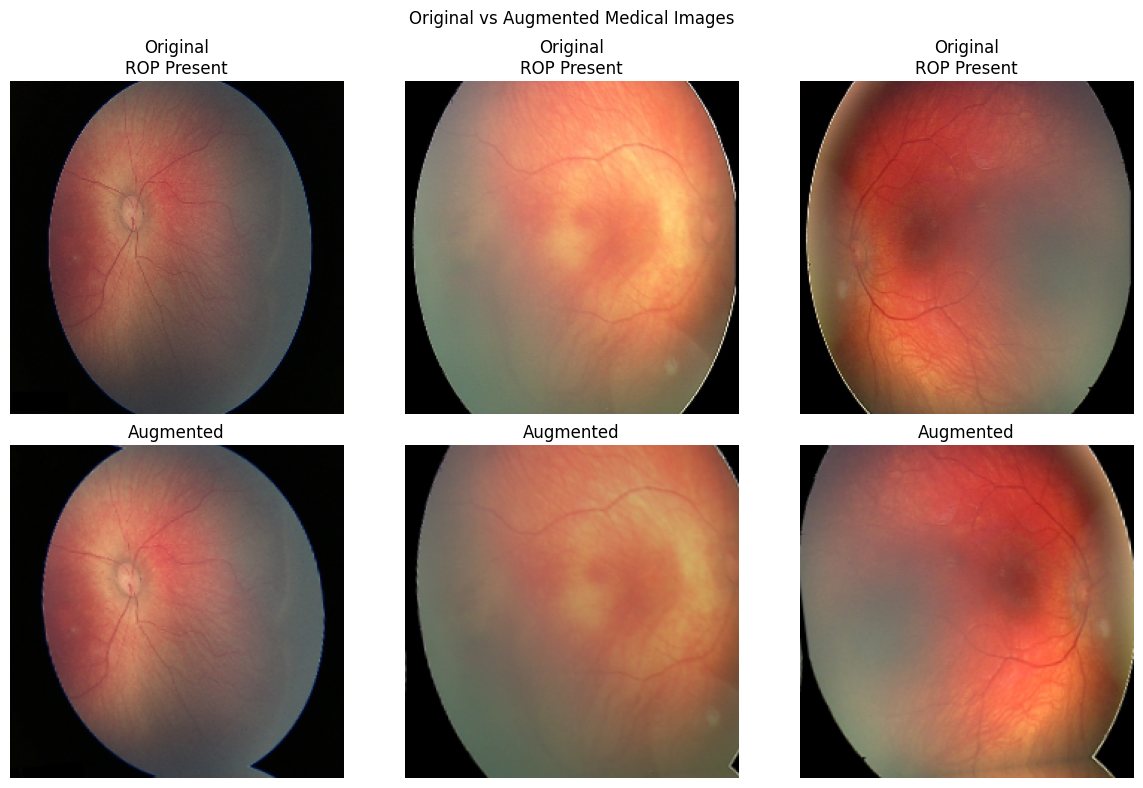

In [27]:
# Cell 7: Medical Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

def create_medical_augmentation():
    """
    Augmentation pipeline specific to retinal images.
    """
    augmentation = ImageDataGenerator(
        rotation_range=15,        # Small rotations
        width_shift_range=0.05,
        height_shift_range=0.05,
        zoom_range=0.1,
        horizontal_flip=True,     # Left/right symmetry
        brightness_range=[0.8, 1.2],
        channel_shift_range=0.1,
        fill_mode='reflect'
    )
    return augmentation

# Create augmentation generator
train_augmentation = create_medical_augmentation()

print("MEDICAL IMAGE AUGMENTATION CONFIGURED")
print(" Small rotations, shifts, zoom, flips, brightness & color adjustments")

# --- Visualization helper ---
def show_augmented_samples(df, indices, augmentation, n_samples=3):
    """Show original vs augmented images"""
    fig, axes = plt.subplots(2, n_samples, figsize=(12, 8))
    
    for i in range(n_samples):
        idx = indices[i]
        row = df.iloc[idx]
        
        # Load original
        img = load_and_preprocess_image(row['filepath'])
        if img is None:
            continue
        
        # Original
        axes[0, i].imshow(img)
        axes[0, i].set_title(f'Original\n{["No ROP", "ROP Present"][row["binary_label"]]}')
        axes[0, i].axis('off')
        
        # Augmented
        img_batch = np.expand_dims(img, 0)   # Add batch dim
        aug_iter = augmentation.flow(img_batch, batch_size=1)
        aug_img = next(aug_iter)[0].astype(np.uint8)  # Convert back to uint8
        
        axes[1, i].imshow(aug_img)
        axes[1, i].set_title('Augmented')
        axes[1, i].axis('off')
    
    plt.suptitle('Original vs Augmented Medical Images')
    plt.tight_layout()
    plt.show()

# --- Demo on 3 training images ---
sample_indices = [train_idx[0], train_idx[len(train_idx)//2], train_idx[-1]]
show_augmented_samples(df, sample_indices, train_augmentation)


In [30]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models, regularizers
import tensorflow as tf

# Cell 8: Model Architecture Design
def create_advanced_rop_model(num_classes=2, input_shape=(224, 224, 3)):
    """
    Create ROP classification model with advanced techniques for medical imaging
    """
    
    print("🏗️ BUILDING ADVANCED ROP CLASSIFICATION MODEL")
    print("-"*50)
    
    # Base model - EfficientNetB0 (optimal balance for medical images)
    print("1. Base Model: EfficientNetB0")
    base_model = EfficientNetB0(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )
    
    # Initially freeze base model for transfer learning
    base_model.trainable = False
    print("   🔒 Base model FROZEN for initial training")
    
    # Build custom classification head
    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    
    # Batch normalization
    x = layers.BatchNormalization()(x)
    
    # Dense block 1
    x = layers.Dense(512, activation='relu',
                     kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Dropout(0.5)(x)
    x = layers.BatchNormalization()(x)
    
    # Dense block 2
    x = layers.Dense(256, activation='relu',
                     kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Dropout(0.4)(x)
    x = layers.BatchNormalization()(x)
    
    # Dense block 3
    x = layers.Dense(128, activation='relu',
                     kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Dropout(0.3)(x)
    
    # Output layer
    predictions = layers.Dense(num_classes, activation='softmax', name='predictions')(x)
    
    model = models.Model(inputs=inputs, outputs=predictions)
    
    print(f"\n✅ Model created with {model.count_params():,} total parameters")
    trainable_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
    print(f"   Trainable parameters: {trainable_params:,}")
    print(f"   Frozen parameters: {model.count_params() - trainable_params:,}")
    
    return model

# Create the model
rop_model = create_advanced_rop_model()

# Display model architecture
print("\n📋 MODEL ARCHITECTURE SUMMARY:")
rop_model.summary()


🏗️ BUILDING ADVANCED ROP CLASSIFICATION MODEL
--------------------------------------------------
1. Base Model: EfficientNetB0


2025-09-24 20:52:05.275104: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
   🔒 Base model FROZEN for initial training

✅ Model created with 4,878,117 total parameters
   Trainable parameters: 824,450
   Frozen parameters: 4,053,667

📋 MODEL ARCHITECTURE SUMMARY:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,878,117 (18.61 MB)

 Trainable params: 824,450 (3.15 MB)

 Non-trainable params: 4,053,667 (15.46 MB)

In [31]:
# Cell 9: Advanced Training Setup
print(" ADVANCED TRAINING STRATEGY")
print("="*40)

# ============================
# 1. Custom Callback
# ============================
class MedicalMetricsCallback(tf.keras.callbacks.Callback):
    """Custom callback to monitor medical-specific metrics"""
    
    def on_epoch_end(self, epoch, logs=None):
        if logs:
            val_precision = logs.get('val_precision', 0)
            val_recall = logs.get('val_recall', 0)
            val_auc = logs.get('val_auc', 0)
            
            # Calculate F1 score
            if val_precision + val_recall > 0:
                f1_score = 2 * (val_precision * val_recall) / (val_precision + val_recall)
            else:
                f1_score = 0
            
            print(f"\n Medical Metrics - Epoch {epoch + 1}:")
            print(f"   Precision: {val_precision:.4f} | Recall: {val_recall:.4f}")
            print(f"   F1-Score: {f1_score:.4f} | AUC: {val_auc:.4f}")
            
            # Medical warnings
            if val_recall < 0.7 and epoch > 5:
                print("   LOW RECALL - May miss ROP cases!")
            if val_precision < 0.5 and epoch > 5:
                print("   LOW PRECISION - Too many false alarms!")

# ============================
# 2. Callbacks Setup
# ============================
def create_medical_callbacks():
    """Create callbacks optimized for medical image classification"""
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_auc',
            patience=12,
            restore_best_weights=True,
            mode='max',
            verbose=1
        ),
        tf.keras.callbacks.ModelCheckpoint(
            'best_rop_model.h5',
            monitor='val_auc',
            save_best_only=True,
            mode='max',
            verbose=1
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=6,
            min_lr=1e-7,
            verbose=1
        ),
        tf.keras.callbacks.CSVLogger('rop_training_log.csv'),
        MedicalMetricsCallback()
    ]
    return callbacks

# ============================
# 3. Phase 1: Compile model (Frozen Base)
# ============================
print("PHASE 1: Feature Learning with Frozen Base")
print("-"*45)

rop_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

# Create callbacks
callbacks = create_medical_callbacks()

print(" Advanced callbacks configured:")
print("   • Early stopping on AUC (medical-appropriate metric)")
print("   • Model checkpointing for best performance")
print("   • Learning rate scheduling")
print("   • Medical metrics monitoring")
print("   • Training history logging")


 ADVANCED TRAINING STRATEGY
PHASE 1: Feature Learning with Frozen Base
---------------------------------------------
 Advanced callbacks configured:
   • Early stopping on AUC (medical-appropriate metric)
   • Model checkpointing for best performance
   • Learning rate scheduling
   • Medical metrics monitoring
   • Training history logging


In [33]:
# Cell 10: Data Preparation for Training
print(" PREPARING DATA FOR TRAINING")
print("="*35)

# Load all images efficiently
def load_images_batch(df, indices, enhance=True):
    """Load batch of images efficiently"""
    images = []
    labels = []
    
    print(f"Loading {len(indices)} images...")
    for i, idx in enumerate(indices):
        if i % 500 == 0:
            print(f"  Progress: {i}/{len(indices)}")
        
        row = df.iloc[idx]
        img = load_and_preprocess_image(row['filepath'])
        
        if img is not None:
            images.append(img)
            labels.append(row['binary_label'])
        else:
            print(f" Failed to load image: {row['filename']}")
    
    return np.array(images), np.array(labels)

# Load training, validation, and test sets
print("Loading training set...")
X_train, y_train_final = load_images_batch(df, train_idx, enhance=True)

print("Loading validation set...")
X_val, y_val_final = load_images_batch(df, val_idx, enhance=True)

print("Loading test set...")
X_test, y_test_final = load_images_batch(df, test_idx, enhance=True)

print(f"\n Data loading completed:")
print(f"   Training:   {X_train.shape[0]} images, shape: {X_train.shape[1:]}")
print(f"   Validation: {X_val.shape[0]} images, shape: {X_val.shape[1:]}")  
print(f"   Test:       {X_test.shape[0]} images, shape: {X_test.shape[1:]}")

# Verify class distribution
print(f"\nFinal class distribution:")
for split_name, y_split in [("Training", y_train_final), ("Validation", y_val_final), ("Test", y_test_final)]:
    counts = np.bincount(y_split)
    rop_pct = counts[1] / len(y_split) * 100
    print(f"   {split_name}: {counts[0]} No ROP, {counts[1]} ROP ({rop_pct:.1f}%)")


 PREPARING DATA FOR TRAINING
Loading training set...
Loading 3842 images...
  Progress: 0/3842
  Progress: 500/3842
  Progress: 1000/3842
  Progress: 1500/3842
  Progress: 2000/3842
  Progress: 2500/3842
  Progress: 3000/3842
  Progress: 3500/3842
Loading validation set...
Loading 961 images...
  Progress: 0/961
  Progress: 500/961
Loading test set...
Loading 1201 images...
  Progress: 0/1201
  Progress: 500/1201
  Progress: 1000/1201

 Data loading completed:
   Training:   3842 images, shape: (224, 224, 3)
   Validation: 961 images, shape: (224, 224, 3)
   Test:       1201 images, shape: (224, 224, 3)

Final class distribution:
   Training: 1907 No ROP, 1935 ROP (50.4%)
   Validation: 477 No ROP, 484 ROP (50.4%)
   Test: 596 No ROP, 605 ROP (50.4%)


**Compiling sets up the optimizer, loss function, and metrics. For binary ROP detection, we use sparse_categorical_crossentropy (since labels are 0 or 1), Adam optimizer, and medical metrics (accuracy, precision, recall, AUC).**

In [37]:
# Labels: 0 or 1, shape (num_samples,)
rop_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
# y_train_final should be shape (num_samples,)


**Callbacks help prevent overfitting, save the best model, and adjust learning rates. Early stopping on AUC is especially important in medical tasks to avoid overfitting to the majority class.**

In [38]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_auc', patience=10, restore_best_weights=True, mode='max', verbose=1),
    tf.keras.callbacks.ModelCheckpoint(
        'best_rop_model.h5', monitor='val_auc', save_best_only=True, mode='max', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1),
    tf.keras.callbacks.CSVLogger('rop_training_log.csv')
]


Epoch 1/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.7416 - loss: 7.0445 - val_accuracy: 0.7419 - val_loss: 4.4741 - learning_rate: 0.0010
Epoch 2/50


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_auc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.7824 - loss: 4.1188 - val_accuracy: 0.7908 - val_loss: 2.8071 - learning_rate: 0.0010
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.7912 - loss: 2.6829 - val_accuracy: 0.8002 - val_loss: 1.9101 - learning_rate: 0.0010
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.7864 - loss: 1.9354 - val_accuracy: 0.8252 - val_loss: 1.4396 - learning_rate: 0.0010
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.7952 - loss: 1.5915 - val_accuracy: 0.8470 - val_loss: 1.1713 - learning_rate: 0.0010
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.8015 - loss: 1.3891 - val_accuracy: 0.8314 - val_loss: 1.0921 - learning_rate: 0.0010
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.8055 - loss: 1.2527 - val_accuracy: 0.8345 - val_loss: 1.0219 - learning_rate: 0.0010
Epoch 8/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.7906 - loss: 1.2241 - val_

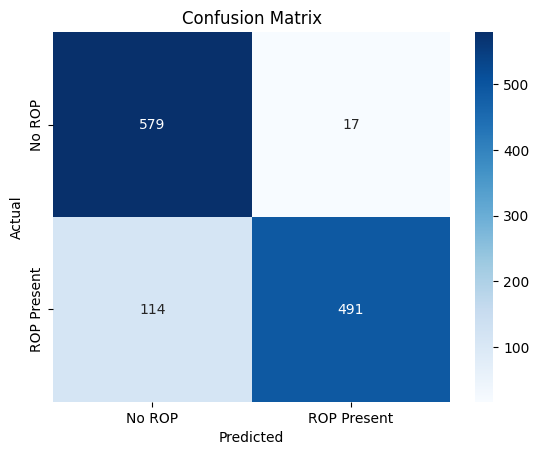

AttributeError: 'ellipsis' object has no attribute 'set_model'

In [40]:
history = rop_model.fit(
    X_train, y_train_final,
    validation_data=(X_val, y_val_final),
    epochs=50,
    batch_size=32,
    class_weight=class_weights,  # Handles imbalance
    callbacks=callbacks,
    verbose=1
)
#evaluate model
results = rop_model.evaluate(X_test, y_test_final, verbose=1)
print(f"\nTest Results:")
for name, value in zip(rop_model.metrics_names, results):
    print(f"{name}: {value:.4f}")

# Confusion matrix and classification report
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(rop_model.predict(X_test), axis=1)
y_true = y_test_final
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["No ROP", "ROP Present"]))

cm = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No ROP", "ROP Present"], yticklabels=["No ROP", "ROP Present"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_cb = ModelCheckpoint(
    'rop_model_best.keras',  # or 'rop_model_best.h5' for HDF5 format
    monitor='val_auc',      # or 'val_loss', 'val_accuracy', .
    save_best_only=True,   # Only save when the metric improves
    mode='max',             # 'max' for AUC/accuracy, 'min' for loss
    verbose=1
)
callbacks = [
    checkpoint_cb,
    tf.keras.callbacks.EarlyStopping(
        monitor='val_auc',
        patience=12,
        restore_best_weights=True,
        mode='max',
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=6,
        min_lr=1e-7,
        verbose=1
    ),
    tf.keras.callbacks.CSVLogger('rop_training_log.csv'),
    MedicalMetricsCallback()
]

# In your model.fit call:
history = rop_model.fit(
    X_train, y_train_final,
    validation_data=(X_val, y_val_final),
    epochs=50,
    batch_size=32,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)

NameError: name 'tf' is not defined